<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ARIMA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2023-11-08 01:23:45--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  7.56MB/s    in 3.2s    

2023-11-08 01:23:49 (7.56 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm

In [4]:
df = pd.read_csv("sp500sub.csv",index_col = "Date",parse_dates = True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [6]:
goog = df[df['Name'] == "GOOG"][['Close']]

<Axes: xlabel='Date'>

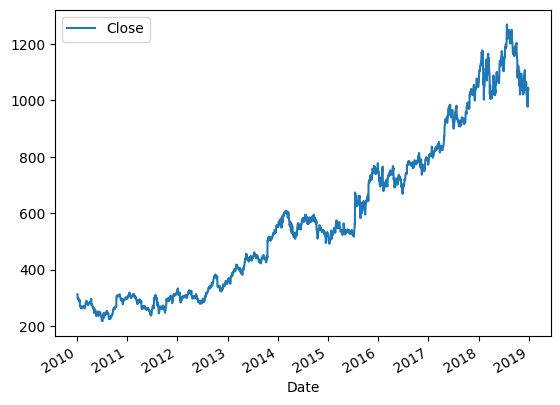

In [7]:
goog.plot()

In [8]:
NTest = 30
train = goog.iloc[:-NTest]
test = goog.iloc[-NTest:]

In [9]:
model = pm.auto_arima(
    train['Close'],
    error_action = 'ignore',
    trace = True,
    suppress_warning = True,maxiter = 10,
    seasonal = False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.40 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.16 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 4.952 seconds


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Wed, 08 Nov 2023   AIC                          16264.983
Time:                        01:24:04   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [12]:
def plot_result(model,fulldata,train,test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start = d,end = -1)
  test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

  fig,ax = plt.subplots(figsize = (10,5))
  ax.plot(fulldata.index,fulldata,label = 'data')
  ax.plot(train.index[d:],train_pred,label = 'fitted')
  ax.plot(test.index,test_pred,label = "forecast")
  ax.fill_between(test.index,confint[:,0],confint[:,1], \
                  color = 'red',alpha = 0.3)

  ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


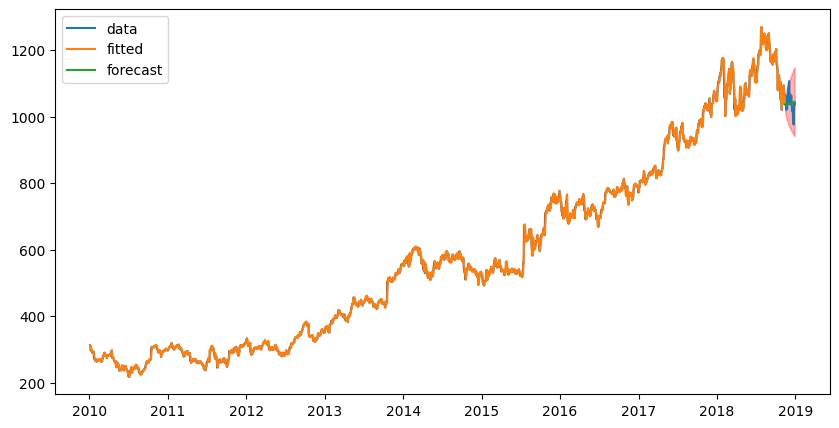

In [13]:
plot_result(model,goog,train,test)

In [14]:
def plot_test(model,test):
   test_pred , confint= model.predict(n_periods = NTest,return_conf_int = True)

   fig,ax = plt.subplots(figsize = (10,5))
   ax.plot(test.index,test,label = 'data')
   ax.plot(test.index,test_pred,label = 'forecast')
   ax.fill_between(test.index,confint[:,0],confint[:,1], \
                   color = 'red',alpha = 0.3)

   ax.legend();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


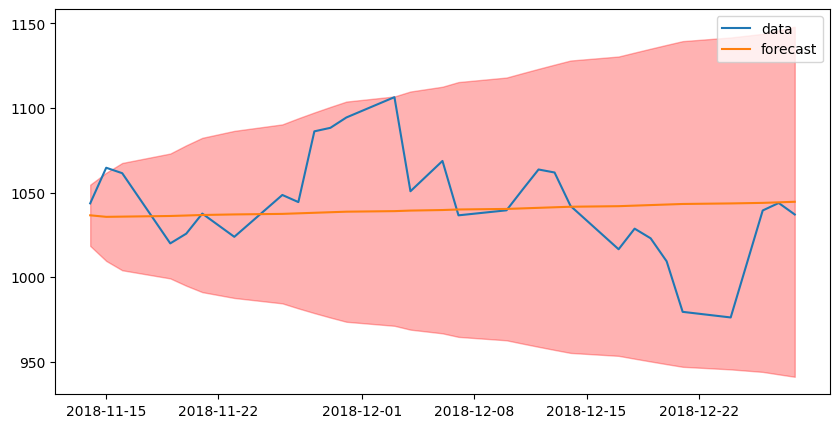

In [15]:
plot_test(model,test)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def rmse(t,y):
  return np.sqrt( np.mean((t-y)**2) )

In [18]:
print("RMSE ARIMA: ", np.sqrt( mean_squared_error(test,model.predict(NTest)) ))
print("RMSE NAIVE: ", rmse(train.iloc[-1],test))

RMSE ARIMA:  30.43660198042493
RMSE NAIVE:  Close    30.029502
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<Axes: xlabel='Date'>

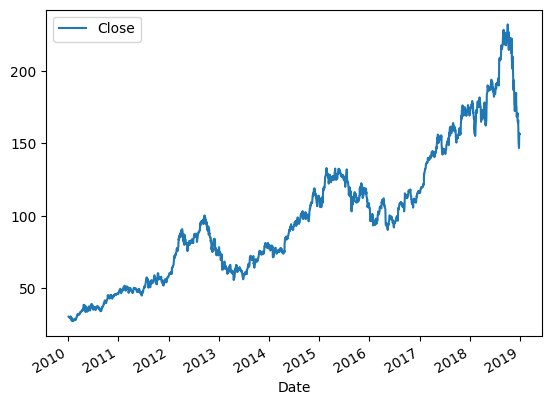

In [21]:
aapl = df[df['Name']=='AAPL'][['Close']]

aapl.plot()

In [23]:
NTest = 12

train = aapl.iloc[:-NTest]
test = aapl.iloc[-NTest:]

In [24]:
model = pm.auto_arima(
    train,error_action = 'ignore',
    trace = True,
    suppress_warning = True,
    maxiter = 10,
    seasonal = True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8778.065, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8776.501, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8776.306, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8776.124, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8777.431, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8777.296, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8775.258, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8776.381, Time=0.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8774.308, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8775.820, Time=0.65 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=8772.883, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8775.038, Time=0.78 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=8774.485, Time=0.56 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=8772.495, Time=1.06 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2251
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -4374.258
Date:                Wed, 08 Nov 2023   AIC                           8768.516
Time:                        01:34:16   BIC                           8825.703
Sample:                             0   HQIC                          8789.389
                               - 2251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1959      0.113      1.738      0.082      -0.025       0.417
ar.L1         -0.5201      0.350     -1.488      0.137      -1.205       0.165
ar.L2         -0.5350      0.282     -1.894      0.058      -1.089       0.019
ar.L3         -0.1351      0.202     -0.670      0.503      -0.531       0.260
ar.L4         -0.4265      0.141     -3.032      0.002      -0.702      -0.151
ma.L1          0.5541      0.353      1.571      0.116      -0.137       1.246
ma.L2          0.5196      0.295      1.760      0.078      -0.059       1.098
ma.L3          0.0732      0.212      0.345      0.730      -0.342       0.489
ma.L4          0.4274      0.164      2.614      0.009       0.107       0.748
sigma2         2.8614      0.042     67.348      0.000       2.778       2.945
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5881.85
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


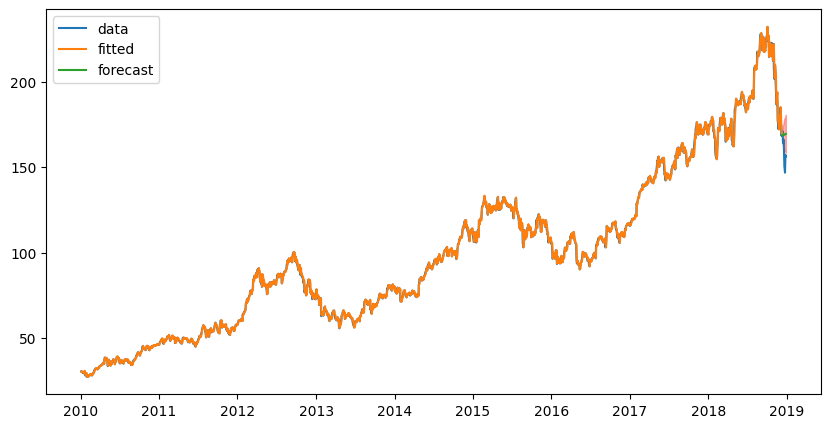

In [26]:
plot_result(model,aapl,train,test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


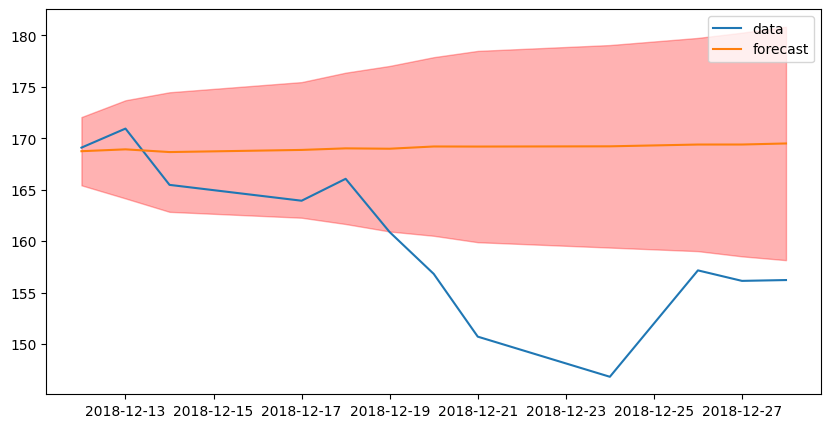

In [27]:
plot_test(model,test)

In [33]:
print('RMSR Test : ', np.sqrt( mean_squared_error(test,model.predict(NTest)) ))
print("RMSE NAIVE: ", rmse(train.iloc[-1],test))


RMSR Test :  11.58554058808631
RMSE NAIVE:  Close    11.10449
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


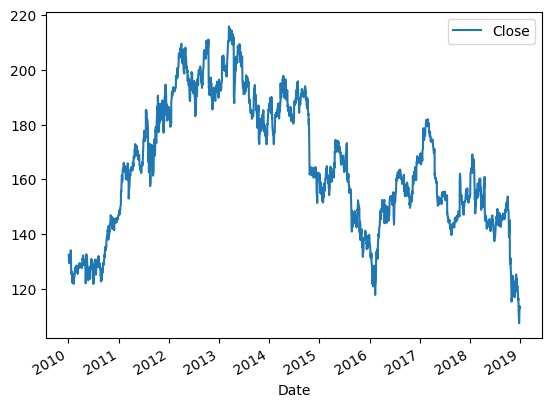

In [35]:
ibm = df[df['Name'] == 'IBM'][['Close']]
ibm.plot();

In [37]:
train = ibm.iloc[:-NTest]
test = ibm.iloc[-NTest:]

In [38]:
model = pm.auto_arima(
    train,
    error_action = 'ignore',trace = True,
    suppress_warning=True,maxiter = 10,
    seasonal = False
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9523.026, Time=1.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9515.631, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9517.408, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9517.403, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9513.646, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9519.024, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.519 seconds


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2251
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4755.823
Date:                Wed, 08 Nov 2023   AIC                           9513.646
Time:                        01:53:02   BIC                           9519.364
Sample:                             0   HQIC                          9515.733
                               - 2251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0129      0.055     72.505      0.000       3.904       4.121
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              5271.02
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.77
Prob(H) (two-sided):                  0.06   Kurtosis:                        10.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


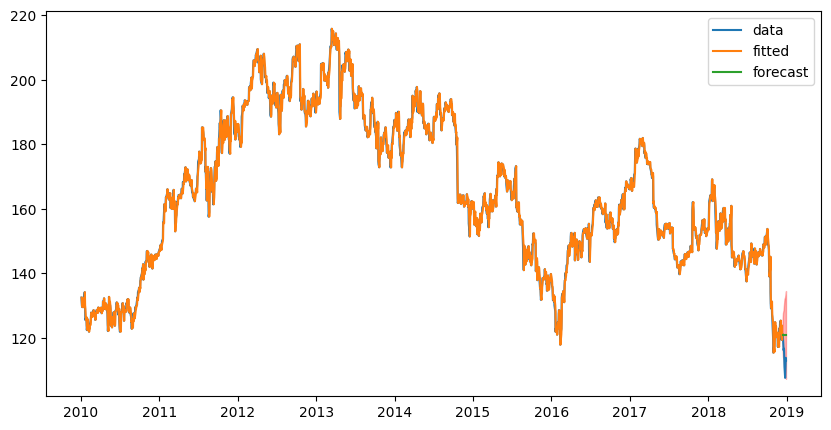

In [40]:
plot_result(model,ibm,train,test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


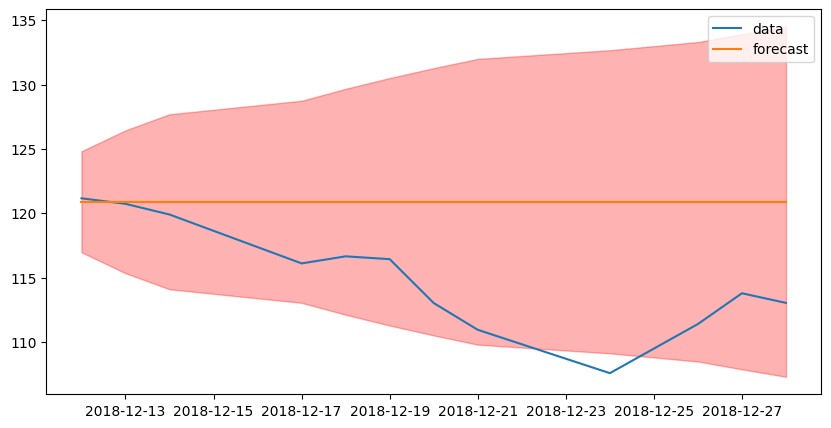

In [41]:
plot_test(model,test)

In [42]:
print('RMSR Test : ', np.sqrt( mean_squared_error(test,model.predict(NTest)) ))
print("RMSE NAIVE: ", rmse(train.iloc[-1],test))

RMSR Test :  7.087755709333064
RMSE NAIVE:  Close    7.087756
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
